# CIFAR-10 for Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, utils
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR-10 dataset
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
# Create baseline CNN model
baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile baseline model
baseline_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
# Train baseline model
baseline_history = baseline_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.8498 - loss: 0.4239 - val_accuracy: 0.7031 - val_loss: 1.0279
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.8670 - loss: 0.3851 - val_accuracy: 0.6905 - val_loss: 1.0457
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.8751 - loss: 0.3581 - val_accuracy: 0.7015 - val_loss: 1.0470
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8807 - loss: 0.3428 - val_accuracy: 0.6973 - val_loss: 1.1346
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.8827 - loss: 0.3270 - val_accuracy: 0.7061 - val_loss: 1.1134
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.8970 - loss: 0.2958 - val_accuracy: 0.6977 - val_loss: 1.1757
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.9006 - loss: 0.2771 - val_accuracy: 0.6957 - val_loss: 1.2012
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9061 - loss: 0.2665 - 

In [ ]:
# Evaluate baseline model
baseline_loss, baseline_acc = baseline_model.evaluate(x_test, y_test)
print(f"\nBaseline Model - Test accuracy: {baseline_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6847 - loss: 1.4378

Baseline Model - Test accuracy: 0.6863


In [ ]:
# Create enhanced CNN model with regularization and augmentation
enhanced_model = models.Sequential([
    # First Conv Block
    layers.Conv2D(32, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Conv Block
    layers.Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile enhanced model
enhanced_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Create data generator for augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Train enhanced model with data augmentation
enhanced_history = enhanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 241s 300ms/step - accuracy: 0.2897 - loss: 3.2172 - val_accuracy: 0.4560 - val_loss: 2.1816
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 233s 298ms/step - accuracy: 0.4651 - loss: 2.1007 - val_accuracy: 0.5425 - val_loss: 1.7382
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 297ms/step - accuracy: 0.5260 - loss: 1.7468 - val_accuracy: 0.5115 - val_loss: 1.9077
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 234s 299ms/step - accuracy: 0.5635 - loss: 1.6171 - val_accuracy: 0.6053 - val_loss: 1.4950
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 231s 296ms/step - accuracy: 0.5893 - loss: 1.5408 - val_accuracy: 0.5960 - val_loss: 1.5900
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 290ms/step - accuracy: 0.6038 - loss: 1.5187 - val_accuracy: 0.6077 - val_loss: 1.5600
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 227s 290ms/step - accuracy: 0.6191 - loss: 1.4916 - val_accuracy: 0.6454 - val_loss: 1.4412
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 227s 290ms/step - accuracy: 0.6256 -

In [ ]:
# Evaluate enhanced model
enhanced_loss, enhanced_acc = enhanced_model.evaluate(x_test, y_test)
print(f"\nEnhanced Model - Test accuracy: {enhanced_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6625 - loss: 1.4206

Enhanced Model - Test accuracy: 0.6519


In [ ]:
# Plot training history for both models
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

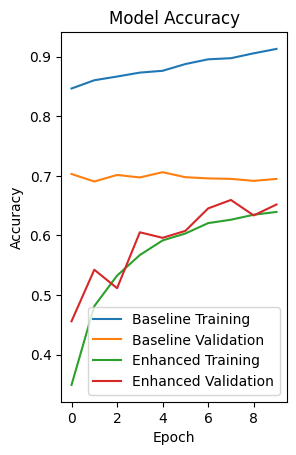

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Baseline Training')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation')
plt.plot(enhanced_history.history['accuracy'], label='Enhanced Training')
plt.plot(enhanced_history.history['val_accuracy'], label='Enhanced Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

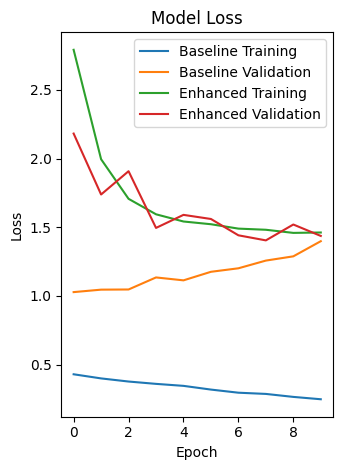

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Baseline Training')
plt.plot(baseline_history.history['val_loss'], label='Baseline Validation')
plt.plot(enhanced_history.history['loss'], label='Enhanced Training')
plt.plot(enhanced_history.history['val_loss'], label='Enhanced Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()